#Importing required libraries

In [ ]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

#Generating synthetic data

In [ ]:
# Set seed for reproducibility
np.random.seed(42)
random.seed(42)

# Row count
n_rows = 10000

In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

n_rows = 10000

# 1. Customer_ID
customer_ids = [f"CUST{str(i).zfill(5)}" for i in range(1, n_rows + 1)]

# 2. Age (18 to 80)
ages = np.random.randint(18, 81, size=n_rows)

# 3. Gender with inconsistent entries
genders_raw = ['M', 'Male', 'male', 'F', 'Female', 'female', 'FEMALE', 'MALE', 'm', 'f', 'Other']
genders = np.random.choice(genders_raw, size=n_rows)

# 4. Policy_Type with typos and case differences
policy_types_raw = ['Auto', 'auto', 'AUTO',
    'Home', 'home', 'HOME',
    'Life', 'life', 'LIFE',
    'Health', 'health', 'HEALTH',
    'Travel', 'travel']
policy_types = np.random.choice(policy_types_raw, size=n_rows)

# 5. Premium ($50 to $1000, with outliers)
premiums = np.random.normal(loc=500, scale=200, size=n_rows)
premiums = np.clip(premiums, 50, 1000)
# Inject outliers
outlier_indices = np.random.choice(n_rows, size=50, replace=False)
premiums[outlier_indices] = np.random.randint(2000, 5000, size=50)

# 6. Claim_Count (0 to 10, skewed + outliers)
claim_counts = np.random.poisson(lam=1.5, size=n_rows)
claim_counts = np.clip(claim_counts, 0, 10)
# Inject a few extreme outliers
extreme_claims = np.random.choice(n_rows, size=20, replace=False)
claim_counts[extreme_claims] = np.random.randint(15, 30, size=20)
# Inject missing values in Claim_Count
missing_claims = np.random.choice(n_rows, size=200, replace=False)
claim_counts = claim_counts.astype(float)
claim_counts[missing_claims] = np.nan

# 7. Region with inconsistent entries
region_variants = [
    'North', 'north', 'NORTH', 'N', 'Nrth',
    'South', 'south', 'SOUTH', 'S', 'Sout',
    'East', 'east', 'EAST', 'E', 'Est',
    'West', 'west', 'WEST', 'W', 'Wst'
]
regions = np.random.choice(region_variants, size=n_rows)

# 8. Date_Joined (random between 2010-01-01 and today)
start_date = datetime(2010, 1, 1)
date_joined = [start_date + timedelta(days=int(np.random.uniform(0, 5475))) for _ in range(n_rows)]

# 9. Customer_Satisfaction (1–10 with some missing and outliers)
satisfaction = np.random.randint(1, 11, size=n_rows).astype(float)
# Add missing values
missing_satisfaction = np.random.choice(n_rows, size=300, replace=False)
satisfaction[missing_satisfaction] = np.nan
# Add outliers
satisfaction_outliers = np.random.choice(n_rows, size=10, replace=False)
satisfaction[satisfaction_outliers] = np.random.choice([0, 15], size=10)

# Combine into DataFrame
df = pd.DataFrame({
    'Customer_ID': customer_ids,
    'Age': ages,
    'Gender': genders,
    'Policy_Type': policy_types,
    'Premium': np.round(premiums, 2),  # no missing values here
    'Claim_Count': claim_counts,
    'Region': regions,
    'Date_Joined': pd.to_datetime(date_joined),
    'Customer_Satisfaction': satisfaction
})

# Inject missing values into Gender
n_missing_gender = int(0.02 * n_rows)
missing_gender_idx = np.random.choice(df.index, size=n_missing_gender, replace=False)
df.loc[missing_gender_idx, 'Gender'] = np.nan

# Add duplicate rows (~1% of total)
duplicates = df.sample(frac=0.01, random_state=1)
df = pd.concat([df, duplicates], ignore_index=True)

# Shuffle the dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Save to CSV
df.to_csv("insurance_data.csv", index=False)

#Data Summary

In [ ]:
df.head()

,Customer_ID,Age,Gender,Policy_Type,Premium,Claim_Count,Region,Date_Joined,Customer_Satisfaction
0,CUST07402,37,male,Auto,668.47,1.0,West,2019-08-17,1.0
1,CUST05835,46,Other,health,146.62,4.0,north,2017-04-26,6.0
2,CUST02123,21,M,travel,810.64,1.0,east,2018-01-04,4.0
3,CUST08789,30,m,Travel,675.57,2.0,East,2013-05-20,6.0
4,CUST00305,49,male,home,723.36,0.0,E,2016-11-24,4.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10100 entries, 0 to 10099
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Customer_ID            10100 non-null  object        
 1   Age                    10100 non-null  int64         
 2   Gender                 9898 non-null   object        
 3   Policy_Type            10100 non-null  object        
 4   Premium                10100 non-null  float64       
 5   Claim_Count            9900 non-null   float64       
 6   Region                 10100 non-null  object        
 7   Date_Joined            10100 non-null  datetime64[ns]
 8   Customer_Satisfaction  9800 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 710.3+ KB


In [ ]:
df.describe(include='all')

,Customer_ID,Age,Gender,Policy_Type,Premium,Claim_Count,Region,Date_Joined,Customer_Satisfaction
count,10100,10100.000000,9898,10100,10100.000000,9900.000000,10100,10100,9800.000000
unique,10000,NaN,11,14,NaN,NaN,20,NaN,NaN
top,CUST05132,NaN,f,auto,NaN,NaN,SOUTH,NaN,NaN
freq,2,NaN,962,763,NaN,NaN,533,NaN,NaN
mean,NaN,49.282079,NaN,NaN,516.070539,1.567374,NaN,2017-05-23 13:51:12.475247616,5.497857
min,NaN,18.000000,NaN,NaN,50.000000,0.000000,NaN,2010-01-01 00:00:00,0.000000
25%,NaN,34.000000,NaN,NaN,366.000000,1.000000,NaN,2013-07-26 12:00:00,3.000000
50%,NaN,49.000000,NaN,NaN,503.045000,1.000000,NaN,2017-05-22 00:00:00,5.000000
75%,NaN,65.000000,NaN,NaN,639.435000,2.000000,NaN,2021-02-27 00:00:00,8.000000
max,NaN,80.000000,NaN,NaN,4975.000000,29.000000,NaN,2024-12-27 00:00:00,15.000000


#Data Cleaning

##Duplicate rows

In [ ]:
df.duplicated().sum()

np.int64(100)

In [ ]:
# Drop exact duplicate rows
df = df.drop_duplicates().reset_index(drop=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

##Handling Missing and Inconsistent Values

In [ ]:
df.isnull().sum()

,0
Customer_ID,0
Age,0
Gender,200
Policy_Type,0
Premium,0
Claim_Count,200
Region,0
Date_Joined,0
Customer_Satisfaction,299


###  Gender

In [ ]:
df['Gender'].value_counts()

,count
Gender,
f,953
FEMALE,920
M,908
Female,898
F,894
Male,891
female,888
m,882
male,875


In [ ]:
#Clean gender values (but don’t touch NaNs)
gender_map = {
    'M': 'Male', 'm': 'Male', 'MALE': 'Male', 'male': 'Male',
    'F': 'Female', 'f': 'Female', 'FEMALE': 'Female', 'female': 'Female',
    'Other': 'Other'
}

In [ ]:
# Use replace so NaNs remain untouched
df['Gender'] = df['Gender'].replace(gender_map)

In [ ]:
df['Gender'].value_counts()

,count
Gender,
Female,4553
Male,4425
Other,822


In [ ]:
#Impute missing gender values with 'Other'
df['Gender'] = df['Gender'].fillna('Other')

In [ ]:
df['Gender'].value_counts()

,count
Gender,
Female,4553
Male,4425
Other,1022


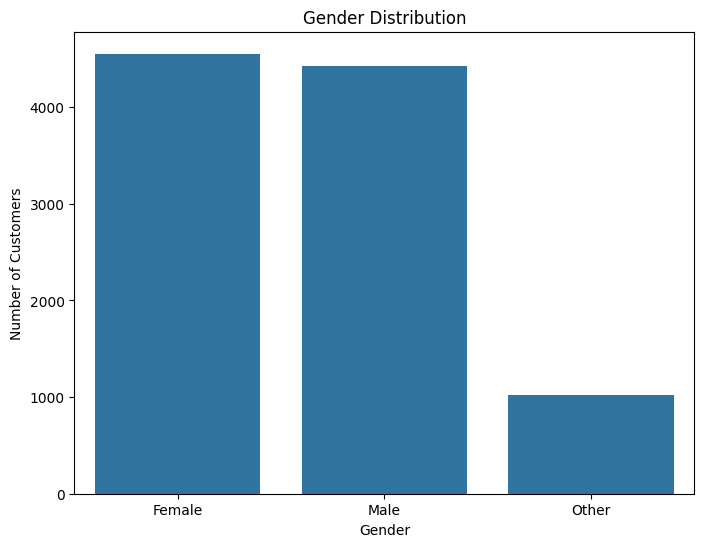

In [ ]:
gender_counts = df['Gender'].value_counts()

# Create a bar chart to visualize the gender distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.show()

### Policy Type

In [ ]:
df['Policy_Type'].value_counts()

,count
Policy_Type,
auto,749
HOME,745
Health,741
Auto,737
AUTO,726
Home,723
life,720
LIFE,711
Travel,708


In [ ]:
# Replace variants with clean standard values
policy_map = {
    'auto': 'Auto', 'AUTO': 'Auto', 'Auto': 'Auto',
    'home': 'Home', 'HOME': 'Home', 'Home': 'Home',
    'life': 'Life', 'LIFE': 'Life', 'Life': 'Life',
    'health': 'Health', 'HEALTH': 'Health', 'Health': 'Health',
    'travel': 'Travel', 'Travel': 'Travel'
}

df['Policy_Type'] = df['Policy_Type'].replace(policy_map)

In [ ]:
df['Policy_Type'].value_counts()

,count
Policy_Type,
Auto,2212
Home,2140
Life,2133
Health,2110
Travel,1405


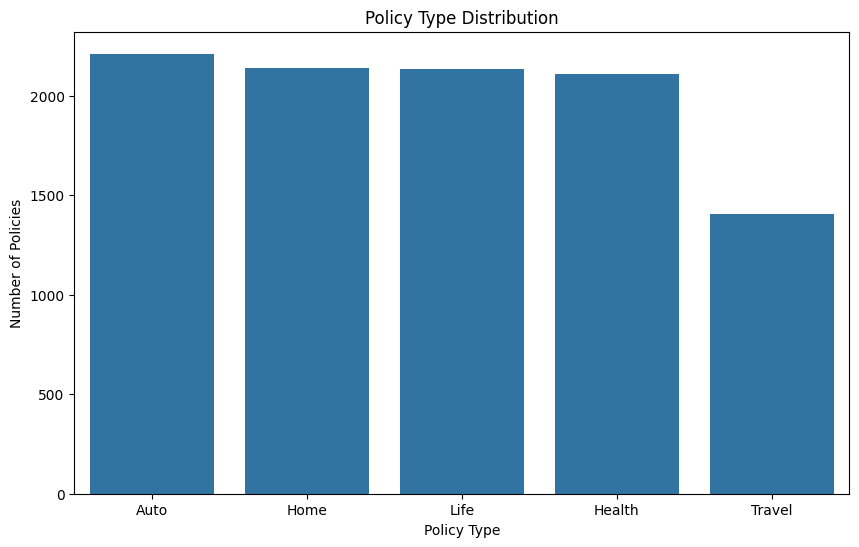

In [ ]:
policy_type_counts = df['Policy_Type'].value_counts()

# Create a bar chart to visualize the Policy Type distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=policy_type_counts.index, y=policy_type_counts.values)
plt.title('Policy Type Distribution')
plt.xlabel('Policy Type')
plt.ylabel('Number of Policies')
plt.show()

### Region

In [ ]:
df['Region'].value_counts()

,count
Region,
SOUTH,527
Nrth,523
east,521
E,517
Sout,516
North,514
W,509
East,508
Est,507


In [ ]:
region_map = {
    'north': 'North', 'NORTH': 'North', 'N': 'North', 'Nrth': 'North', 'North': 'North',
    'south': 'South', 'SOUTH': 'South', 'S': 'South', 'Sout': 'South', 'South': 'South',
    'east': 'East', 'EAST': 'East', 'E': 'East', 'Est': 'East', 'East': 'East',
    'west': 'West', 'WEST': 'West', 'W': 'West', 'Wst': 'West', 'West': 'West'
}

df['Region'] = df['Region'].replace(region_map)

In [ ]:
df['Region'].value_counts()

,count
Region,
East,2541
South,2516
North,2476
West,2467


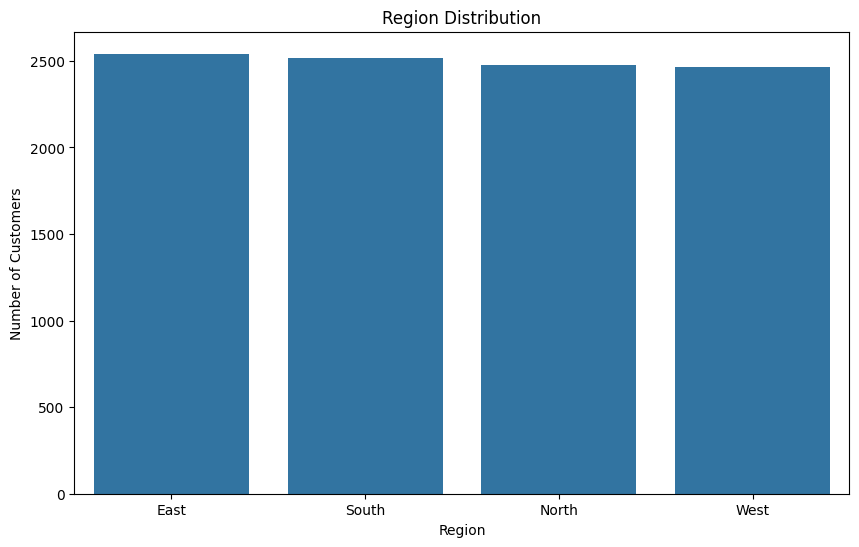

In [ ]:
region_counts = df['Region'].value_counts()

# Create a bar chart to visualize the region distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=region_counts.index, y=region_counts.values)
plt.title('Region Distribution')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()

### Claim Count

In [ ]:
# Function to impute missing Claim_Counts using Age+Premium or Region+Premium
def impute_claim(row):
    if pd.notnull(row['Claim_Count']):
        return row['Claim_Count']

    policy = row['Policy_Type'].strip().lower()
    premium = row['Premium']

    if policy in ['health', 'auto', 'life']:
        age = row['Age']
        group = df[
            (df['Policy_Type'].str.lower() == policy) &
            (df['Age'] == age) &
            (df['Premium'] == premium)
        ]

    elif policy in ['home', 'travel']:
        region = row['Region']
        group = df[
            (df['Policy_Type'].str.lower() == policy) &
            (df['Region'] == region) &
            (df['Premium'] == premium)
        ]

    else:
        # In case of unknown policy type
        group = df[df['Policy_Type'].str.lower() == policy]

    # Fallback to policy-level mean if group is too small
    if len(group) < 5:
        group = df[df['Policy_Type'].str.lower() == policy]

    return round(group['Claim_Count'].dropna().mean())

# Apply row-wise imputation
df['Claim_Count'] = df.apply(impute_claim, axis=1)

In [ ]:
df['Claim_Count'].isnull().sum()

np.int64(0)

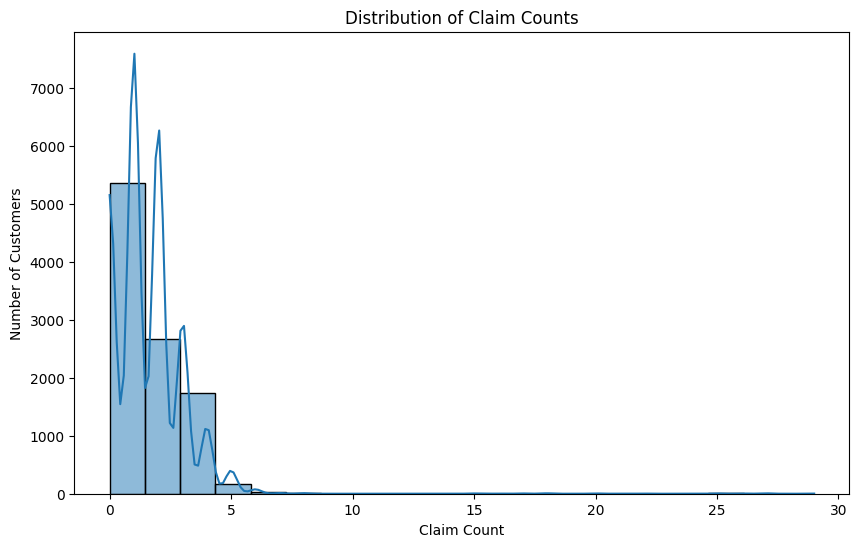

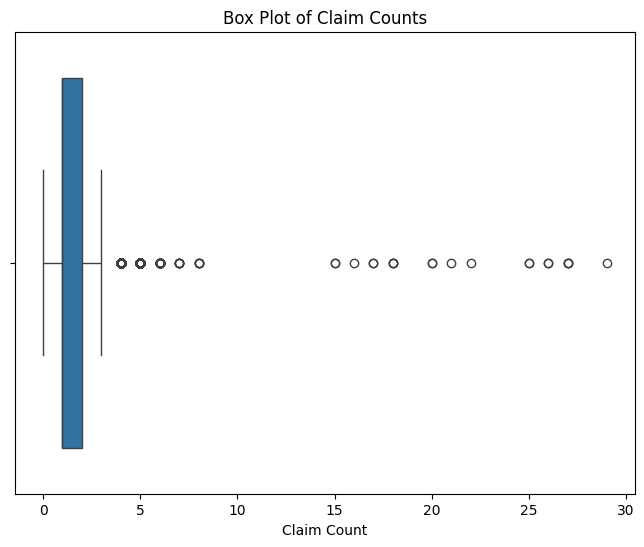

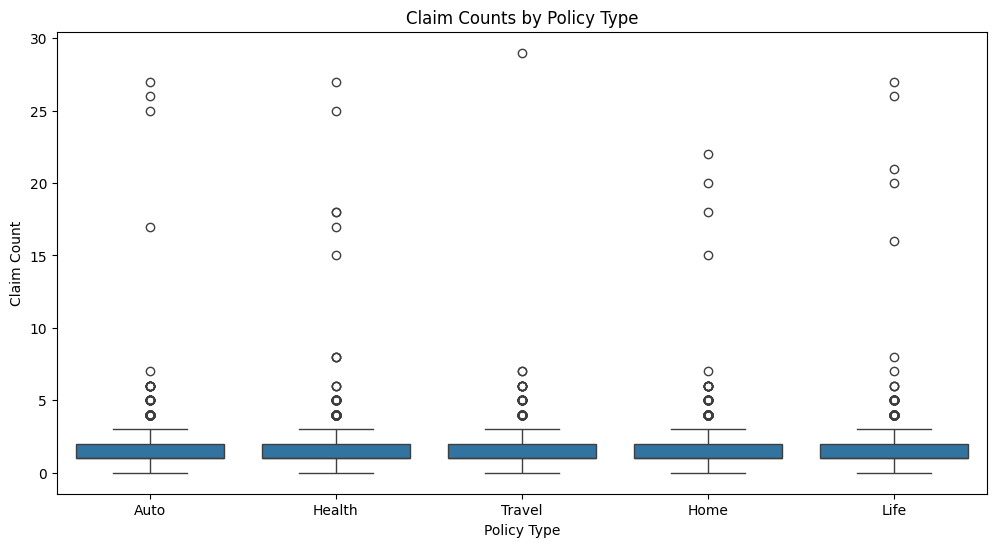

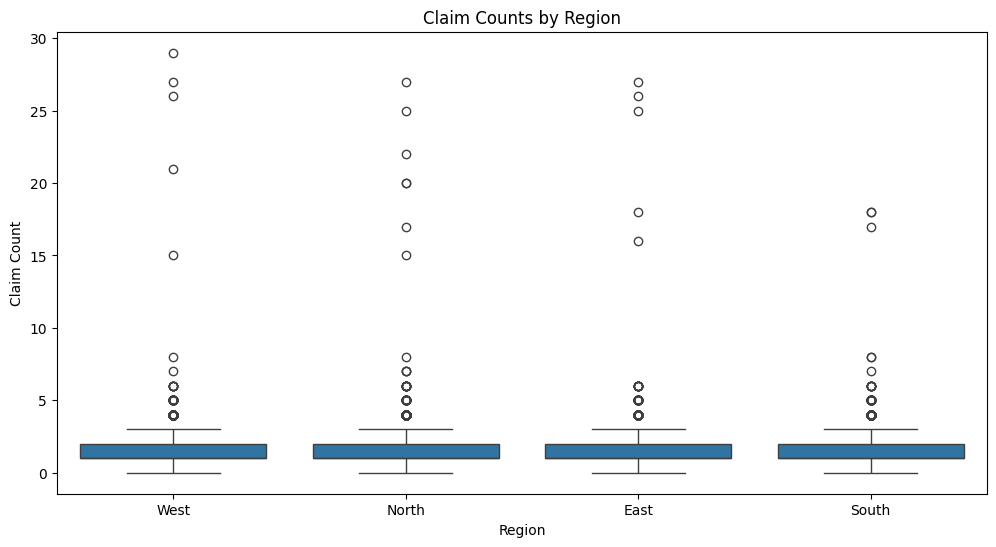

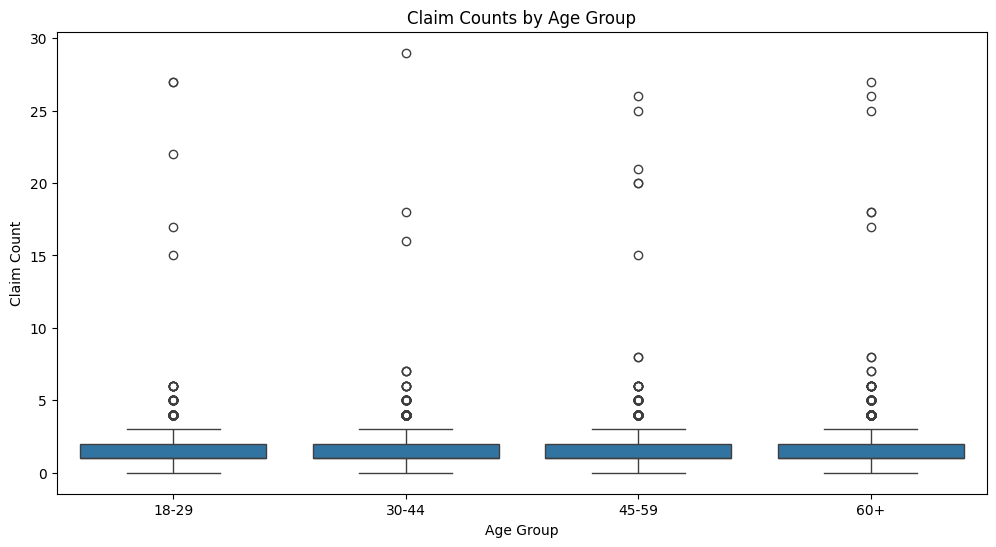

In [ ]:
# Visualize the distribution of claim counts
plt.figure(figsize=(10, 6))
sns.histplot(df['Claim_Count'], bins=20, kde=True)
plt.title('Distribution of Claim Counts')
plt.xlabel('Claim Count')
plt.ylabel('Number of Customers')
plt.show()
print("")

# Box plot to show outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Claim_Count'])
plt.title('Box Plot of Claim Counts')
plt.xlabel('Claim Count')
plt.show()
print("")
# Analyze the claim count by policy type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Policy_Type', y='Claim_Count', data=df)
plt.title('Claim Counts by Policy Type')
plt.xlabel('Policy Type')
plt.ylabel('Claim Count')
plt.show()
print("")

# Analyze the claim count by region
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Claim_Count', data=df)
plt.title('Claim Counts by Region')
plt.xlabel('Region')
plt.ylabel('Claim Count')
plt.show()
print("")

# Analyze the claim count by age group
# Create age groups
bins = [18, 30, 45, 60, 80]
labels = ['18-29', '30-44', '45-59', '60+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(12, 6))
sns.boxplot(x='Age_Group', y='Claim_Count', data=df)
plt.title('Claim Counts by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Claim Count')
plt.show()


### Customer Satisfaction

In [ ]:
print(f"Minimum Customer Satisfaction: {df['Customer_Satisfaction'].min()}")
print(f"Maximum Customer Satisfaction: {df['Customer_Satisfaction'].max()}")

Minimum Customer Satisfaction: 0.0
Maximum Customer Satisfaction: 15.0


In [ ]:
df.loc[df['Customer_Satisfaction'] > 10, 'Customer_Satisfaction'] = 10

In [ ]:
df.loc[df['Customer_Satisfaction'] < 1, 'Customer_Satisfaction'] = 1

In [ ]:
print(f"Minimum Customer Satisfaction: {df['Customer_Satisfaction'].min()}")
print(f"Maximum Customer Satisfaction: {df['Customer_Satisfaction'].max()}")

Minimum Customer Satisfaction: 1.0
Maximum Customer Satisfaction: 10.0


In [ ]:
# Regional mean satisfaction
regional_avg = df.groupby('Region')['Customer_Satisfaction'].mean()
# Impute missing satisfaction with region-based average
df['Customer_Satisfaction'] = df.apply(lambda row: regional_avg[row['Region']]
                                       if pd.isnull(row['Customer_Satisfaction'])
                                       else row['Customer_Satisfaction'], axis=1)

In [ ]:
df.isnull().sum()

,0
Customer_ID,0
Age,0
Gender,0
Policy_Type,0
Premium,0
Claim_Count,0
Region,0
Date_Joined,0
Customer_Satisfaction,0
Age_Group,0


In [ ]:
df.describe( )

,Age,Premium,Claim_Count,Date_Joined,Customer_Satisfaction
count,10000.000000,10000.000000,10000.000000,10000,10000.000000
mean,49.304400,516.407235,1.576900,2017-05-23 22:59:05.279999744,5.498412
min,18.000000,50.000000,0.000000,2010-01-01 00:00:00,1.000000
25%,34.000000,366.320000,1.000000,2013-07-27 00:00:00,3.000000
50%,49.000000,503.120000,1.000000,2017-05-20 00:00:00,5.516197
75%,65.000000,639.972500,2.000000,2021-02-28 00:00:00,8.000000
max,80.000000,4975.000000,29.000000,2024-12-27 00:00:00,10.000000
std,18.189349,291.097270,1.534054,NaN,2.844922


In [ ]:
import pandas as pd
df['Customer_Satisfaction'] = pd.cut(df['Customer_Satisfaction'],
                                  bins=[0, 5, 7, 10],
                                  labels=['Low', 'Medium', 'High'])

In [ ]:
df.head()

,Customer_ID,Age,Gender,Policy_Type,Premium,Claim_Count,Region,Date_Joined,Customer_Satisfaction,Age_Group
0,CUST07402,37,Male,Auto,668.47,1.0,West,2019-08-17,Low,30-44
1,CUST05835,46,Other,Health,146.62,4.0,North,2017-04-26,Medium,45-59
2,CUST02123,21,Male,Travel,810.64,1.0,East,2018-01-04,Low,18-29
3,CUST08789,30,Male,Travel,675.57,2.0,East,2013-05-20,Medium,18-29
4,CUST00305,49,Male,Home,723.36,0.0,East,2016-11-24,Low,45-59


#Time based features

In [ ]:
# Extract Year and Month
df['Join_Year'] = df['Date_Joined'].dt.year
df['Join_Month'] = df['Date_Joined'].dt.month_name()

In [ ]:
# Group by 'Join_Year' and count the number of customers
customers_by_year = df.groupby('Join_Year')['Customer_ID'].count()

# Analyze the number of customers who joined in 2023 vs. 2024
customers_2023 = customers_by_year.get(2023, 0)
customers_2024 = customers_by_year.get(2024, 0)

print(f"Customers joined in 2023: {customers_2023}")
print(f"Customers joined in 2024: {customers_2024}")

Customers joined in 2023: 643
Customers joined in 2024: 640


In [ ]:
# Assuming df is your DataFrame
Month = df['Date_Joined'].dt.month_name()

# Group by month and count signups
monthly_signups = df.groupby(Month)['Customer_ID'].count()

# Find the months with the highest number of signups
months_with_most_signups = monthly_signups.sort_values(ascending=False)

months_with_most_signups.head()

,Customer_ID
Date_Joined,
October,889
April,870
July,863
March,857
November,856


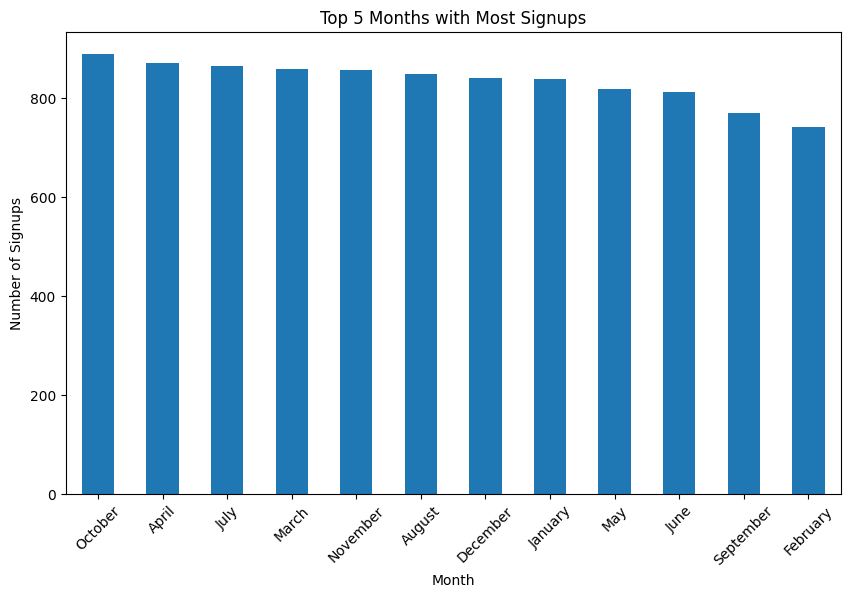

In [ ]:
plt.figure(figsize=(10, 6))
months_with_most_signups.plot(kind='bar')
plt.title('Top 5 Months with Most Signups')
plt.xlabel('Month')
plt.ylabel('Number of Signups')
plt.xticks(rotation=45)
plt.show()


In [ ]:
#Calculate Tenure (in years and months)
today = pd.to_datetime('today')

# Tenure in days
df['Tenure_Days'] = (today - df['Date_Joined']).dt.days

# Convert to months/years
df['Tenure_Years'] = df['Tenure_Days'] // 365
df['Tenure_Months'] = df['Tenure_Days'] // 30

In [ ]:
bins = [0, 730, 1825, np.inf]  # Low: <2 yrs, Medium: 2–5 yrs, High: >5 yrs
labels = ['Low', 'Medium', 'High']

# Create Tenure_Category based on bins
df['Tenure_Category'] = pd.cut(df['Tenure_Days'], bins=bins, labels=labels, right=True)

In [ ]:
df.head()

,Customer_ID,Age,Gender,Policy_Type,Premium,Claim_Count,Region,Date_Joined,Customer_Satisfaction,Age_Group,Join_Year,Join_Month,Tenure_Days,Tenure_Years,Tenure_Months,Tenure_Category
0,CUST07402,37,Male,Auto,668.47,1.0,West,2019-08-17,Low,30-44,2019,August,2123,5,70,High
1,CUST05835,46,Other,Health,146.62,4.0,North,2017-04-26,Medium,45-59,2017,April,2966,8,98,High
2,CUST02123,21,Male,Travel,810.64,1.0,East,2018-01-04,Low,18-29,2018,January,2713,7,90,High
3,CUST08789,30,Male,Travel,675.57,2.0,East,2013-05-20,Medium,18-29,2013,May,4403,12,146,High
4,CUST00305,49,Male,Home,723.36,0.0,East,2016-11-24,Low,45-59,2016,November,3119,8,103,High


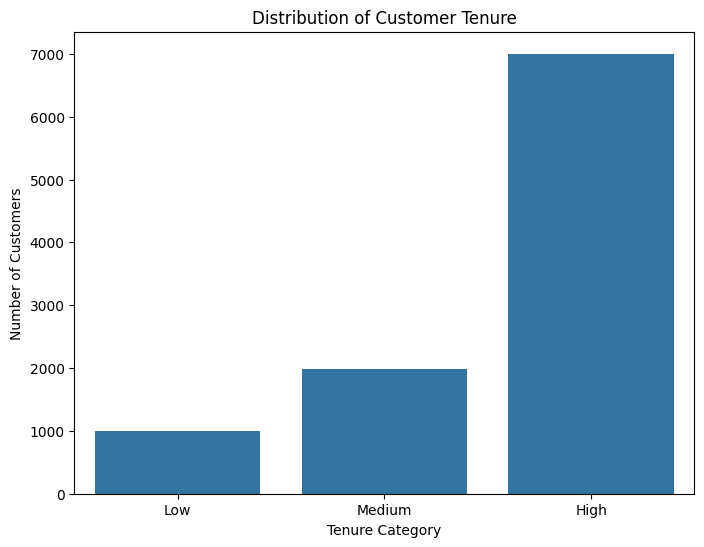

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Tenure_Category', data=df)
plt.title('Distribution of Customer Tenure')
plt.xlabel('Tenure Category')
plt.ylabel('Number of Customers')
plt.show()

#low satisfaction + long-tenure customers segment

In [ ]:
low_satis_long_tenure = df[
    (df['Customer_Satisfaction'] == 'Low') &
    (df['Tenure_Category'] == 'High')
]

In [ ]:
print("Segment size:", len(low_satis_long_tenure))
print("Average Premium:", low_satis_long_tenure['Premium'].mean())
print("Average Claim Count:", low_satis_long_tenure['Claim_Count'].mean())
print("Top Regions:", low_satis_long_tenure['Region'].value_counts().head())
print("Policy Type Breakdown:\n", low_satis_long_tenure['Policy_Type'].value_counts())

Segment size: 3358
Average Premium: 505.74051220964856
Average Claim Count: 1.5786182251340084
Top Regions: Region
East     875
North    846
West     824
South    813
Name: count, dtype: int64
Policy Type Breakdown:
 Policy_Type
Auto      759
Home      733
Life      706
Health    699
Travel    461
Name: count, dtype: int64


Policy Type Distribution for Low Satisfaction and Long Tenure Customers:
Policy_Type
Auto      22.602740
Home      21.828469
Life      21.024419
Health    20.815962
Travel    13.728410
Name: proportion, dtype: float64


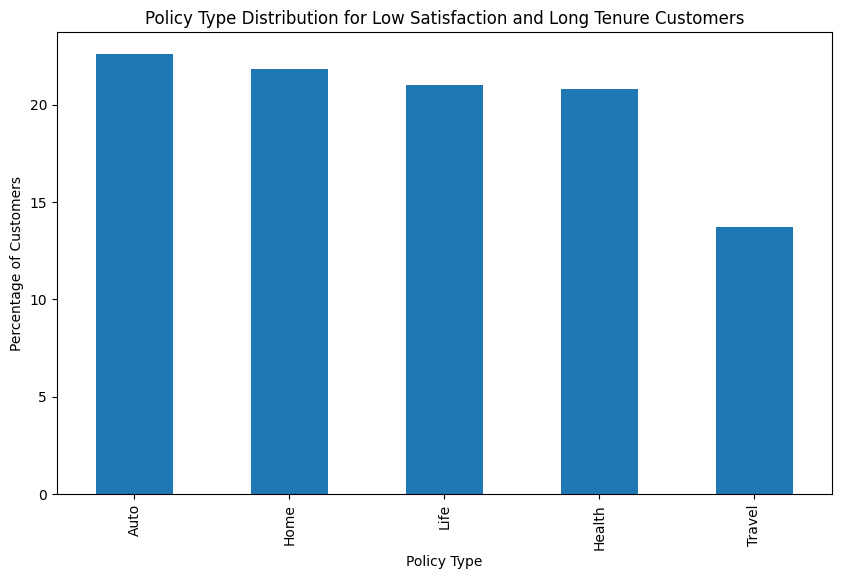

In [ ]:
policy_type_distribution = low_satis_long_tenure['Policy_Type'].value_counts(normalize=True) * 100

print("Policy Type Distribution for Low Satisfaction and Long Tenure Customers:")
print(policy_type_distribution)

# You can visualize it using a bar chart:
plt.figure(figsize=(10, 6))
policy_type_distribution.plot(kind='bar')
plt.title('Policy Type Distribution for Low Satisfaction and Long Tenure Customers')
plt.xlabel('Policy Type')
plt.ylabel('Percentage of Customers')
plt.show()

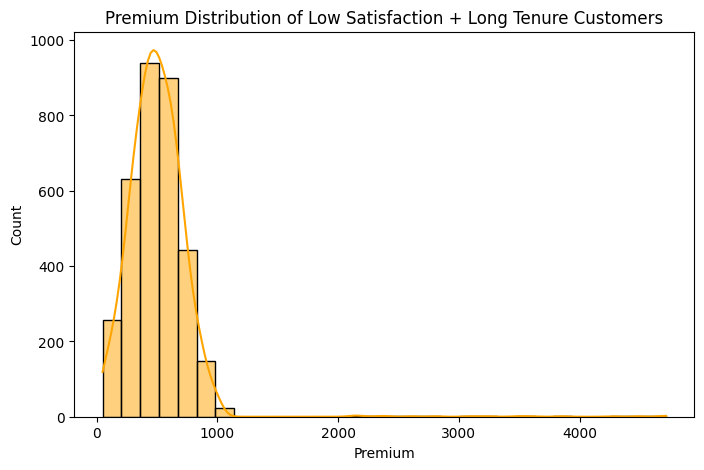

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(low_satis_long_tenure['Premium'], bins=30, kde=True, color='orange')
plt.title('Premium Distribution of Low Satisfaction + Long Tenure Customers')
plt.xlabel('Premium')
plt.ylabel('Count')
plt.show()

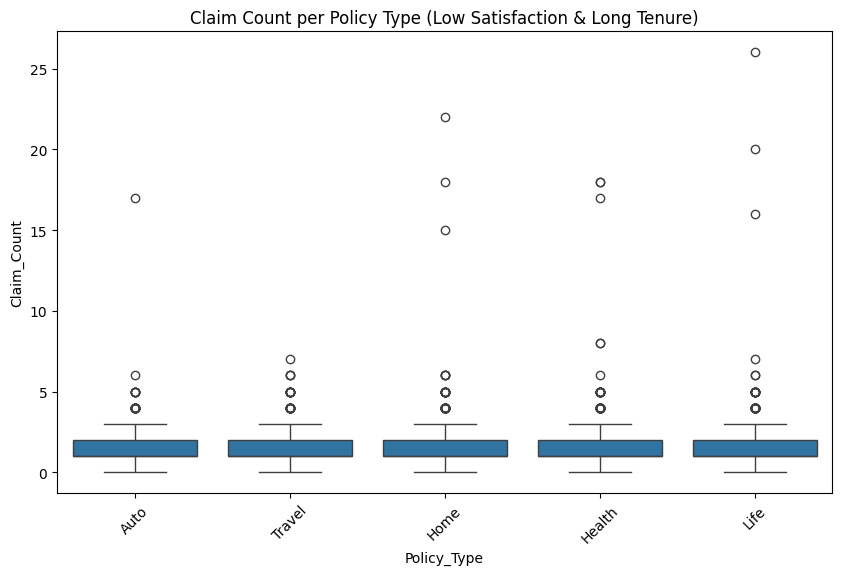

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=low_satis_long_tenure, x='Policy_Type', y='Claim_Count')
plt.title('Claim Count per Policy Type (Low Satisfaction & Long Tenure)')
plt.xticks(rotation=45)
plt.show()

#low satisfaction and medium tenure customers

In [ ]:
segment_medium_tenure_low_sat = df[(df['Customer_Satisfaction'] == 'Low') & (df['Tenure_Category'] == 'Medium')]

In [ ]:
segment_size = segment_medium_tenure_low_sat.shape[0]
avg_premium = segment_medium_tenure_low_sat['Premium'].mean()
avg_claim = segment_medium_tenure_low_sat['Claim_Count'].mean()
top_regions = segment_medium_tenure_low_sat['Region'].value_counts().head()
policy_breakdown = segment_medium_tenure_low_sat['Policy_Type'].value_counts()

print(f"Segment size: {segment_size}")
print(f"Average Premium: {avg_premium}")
print(f"Average Claim Count: {avg_claim}")
print("Top Regions:\n", top_regions)
print("Policy Type Breakdown:\n", policy_breakdown)

Segment size: 976
Average Premium: 522.0881147540983
Average Claim Count: 1.5993852459016393
Top Regions:
 Region
North    270
South    247
West     234
East     225
Name: count, dtype: int64
Policy Type Breakdown:
 Policy_Type
Home      223
Life      212
Auto      209
Health    198
Travel    134
Name: count, dtype: int64


Policy Type Distribution for Medium Tenure and Low Satisfaction Customers:
Policy_Type
Home      22.848361
Life      21.721311
Auto      21.413934
Health    20.286885
Travel    13.729508
Name: proportion, dtype: float64


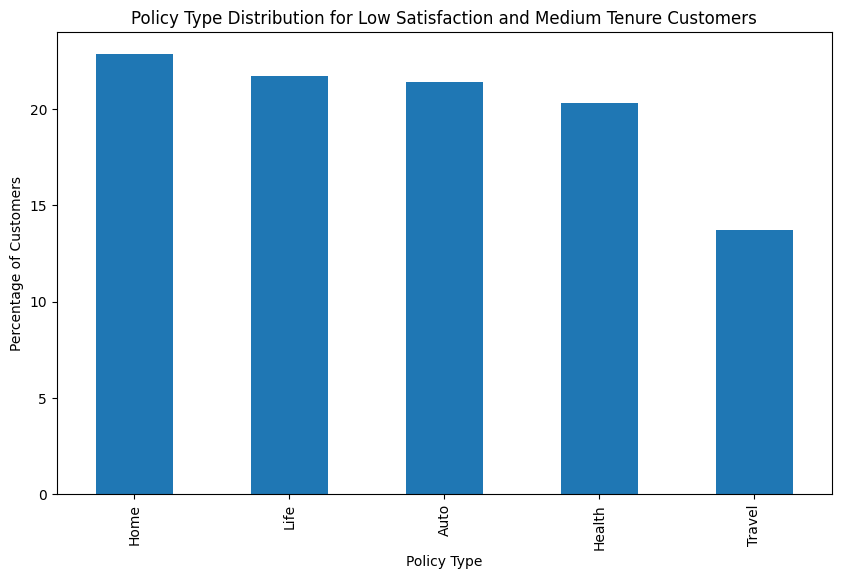

In [ ]:
policy_type_distribution = segment_medium_tenure_low_sat['Policy_Type'].value_counts(normalize=True) * 100

print("Policy Type Distribution for Medium Tenure and Low Satisfaction Customers:")
print(policy_type_distribution)

# Visualize it using a bar chart:
plt.figure(figsize=(10, 6))
policy_type_distribution.plot(kind='bar')
plt.title('Policy Type Distribution for Low Satisfaction and Medium Tenure Customers')
plt.xlabel('Policy Type')
plt.ylabel('Percentage of Customers')
plt.show()


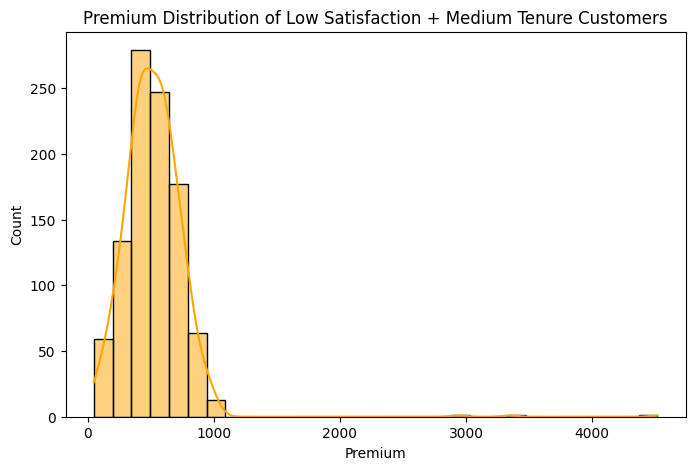

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(segment_medium_tenure_low_sat['Premium'], bins=30, kde=True, color='orange')
plt.title('Premium Distribution of Low Satisfaction + Medium Tenure Customers')
plt.xlabel('Premium')
plt.ylabel('Count')
plt.show()

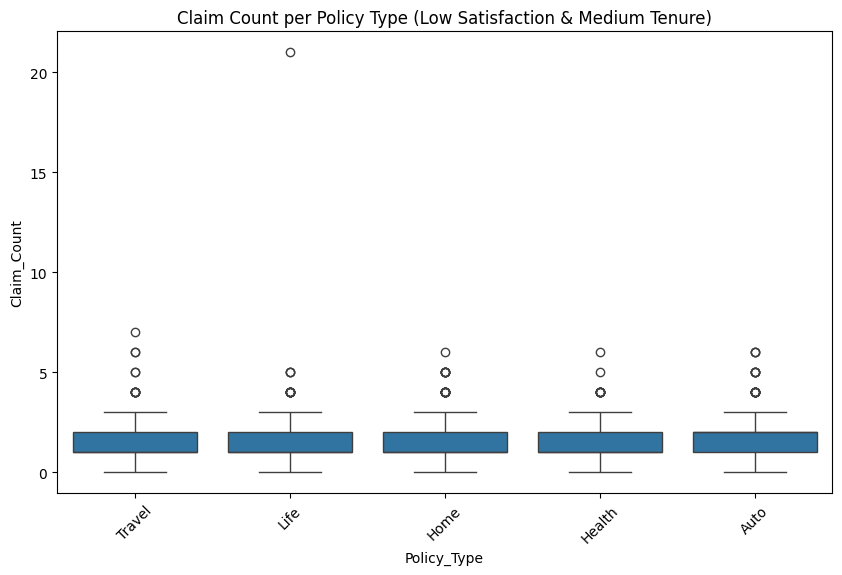

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=segment_medium_tenure_low_sat, x='Policy_Type', y='Claim_Count')
plt.title('Claim Count per Policy Type (Low Satisfaction & Medium Tenure)')
plt.xticks(rotation=45)
plt.show()

#Customer Satisfaction per Region

In [ ]:
# Percentage of satisfaction levels per region
satisfaction_percent = df.groupby(['Region', 'Customer_Satisfaction']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack(fill_value=0)

print(satisfaction_percent)

Customer_Satisfaction        Low     Medium       High
Region Region                                         
East   East            48.681621  22.432113  28.886265
North  North           50.403877  19.870759  29.725363
South  South           47.337043  23.370429  29.292528
West   West            47.628699  23.713012  28.658289


<ipython-input-56-aa5ba463010b>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  satisfaction_percent = df.groupby(['Region', 'Customer_Satisfaction']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack(fill_value=0)


<ipython-input-57-46145c078adf>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Region', 'Customer_Satisfaction'])


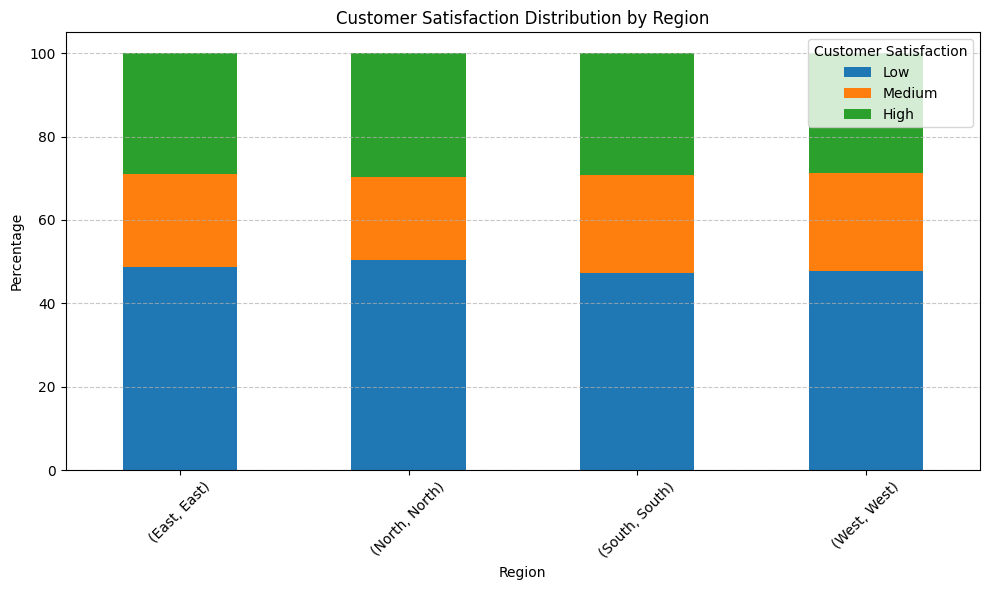

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group and calculate percentage
satisfaction_percent = (
    df.groupby(['Region', 'Customer_Satisfaction'])
    .size()
    .groupby(level=0)
    .apply(lambda x: 100 * x / x.sum())
    .unstack(fill_value=0)
)

# Sort regions alphabetically or keep custom order
satisfaction_percent = satisfaction_percent.sort_index()

# Plot
satisfaction_percent.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Customer Satisfaction Distribution by Region')
plt.ylabel('Percentage')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.legend(title='Customer Satisfaction')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#Customer Satisfaction Distribution by Policy Type

<ipython-input-58-61a5d63e4060>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Policy_Type', 'Customer_Satisfaction'])


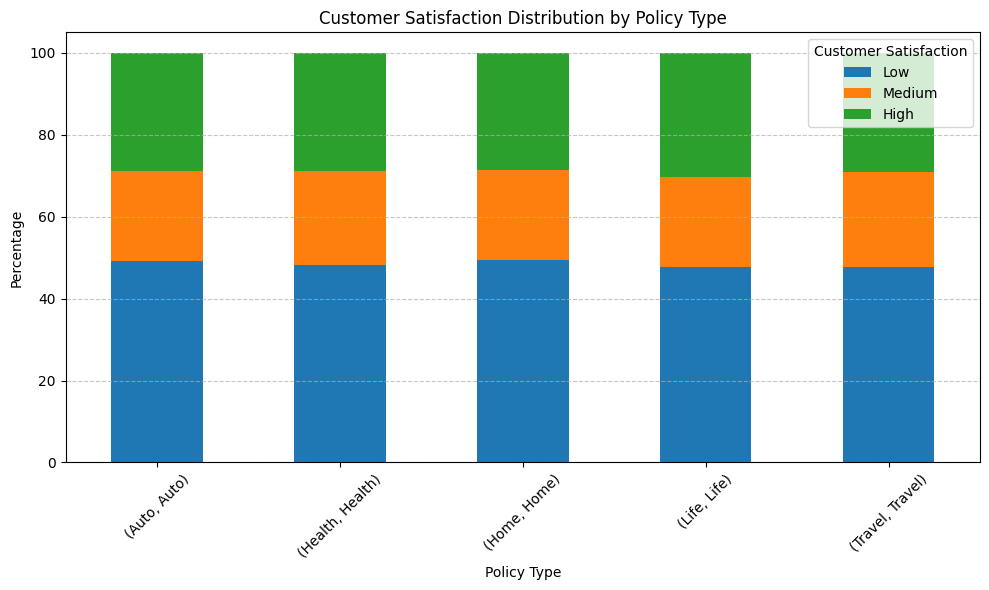

In [ ]:
# Group and calculate percentage
policy_satisfaction_percent = (
    df.groupby(['Policy_Type', 'Customer_Satisfaction'])
    .size()
    .groupby(level=0)
    .apply(lambda x: 100 * x / x.sum())
    .unstack(fill_value=0)
)

# Plot
policy_satisfaction_percent.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Customer Satisfaction Distribution by Policy Type')
plt.ylabel('Percentage')
plt.xlabel('Policy Type')
plt.xticks(rotation=45)
plt.legend(title='Customer Satisfaction')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Age Group Segmentation

In [ ]:
bins = [18, 30, 45, 60, 80]
labels = ['18–30', '31–45', '46–60', '61–80']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True, include_lowest=True)

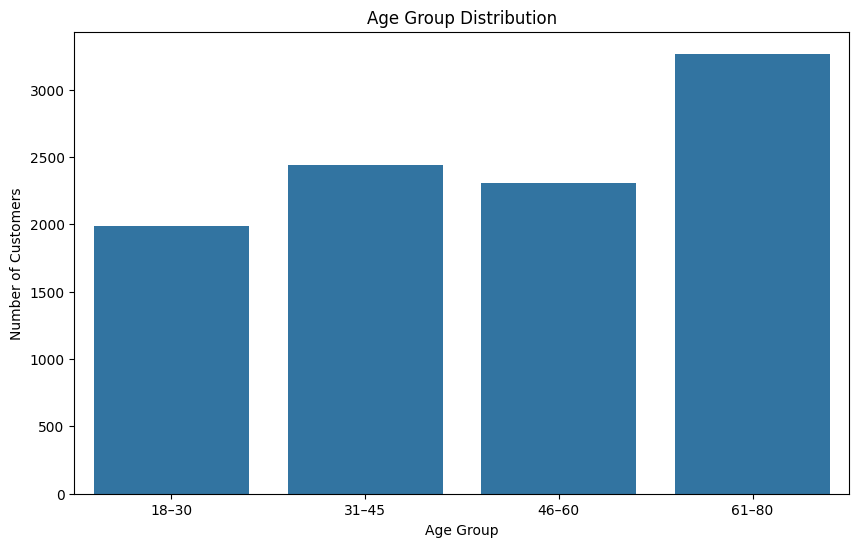

In [ ]:
age_group_counts = df['Age_Group'].value_counts()

# Visualize the distribution of customers across age groups
plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values)
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.show()


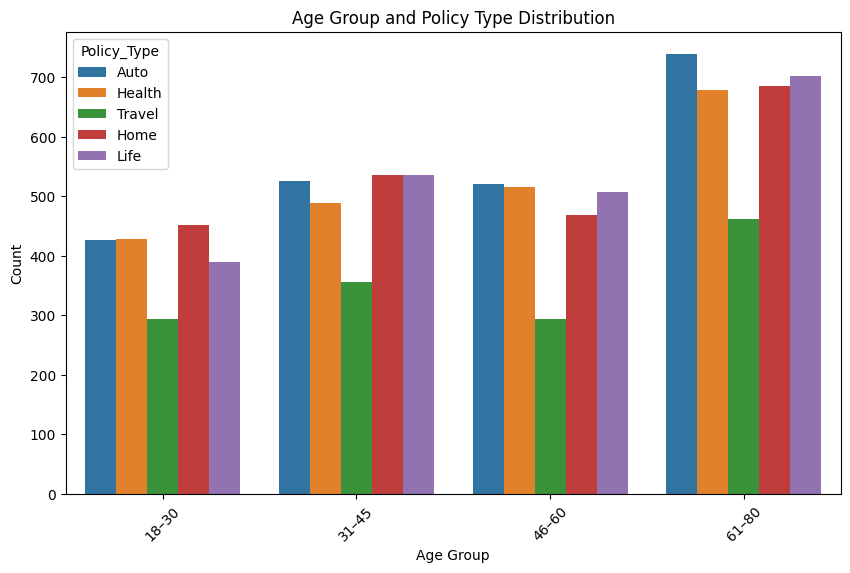

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Age_Group', hue='Policy_Type')
plt.title('Age Group and Policy Type Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


#Customer Satisfaction Distribution by Age

<ipython-input-62-2db6840e3633>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Age_Group', 'Customer_Satisfaction'])
<ipython-input-62-2db6840e3633>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(level=0)


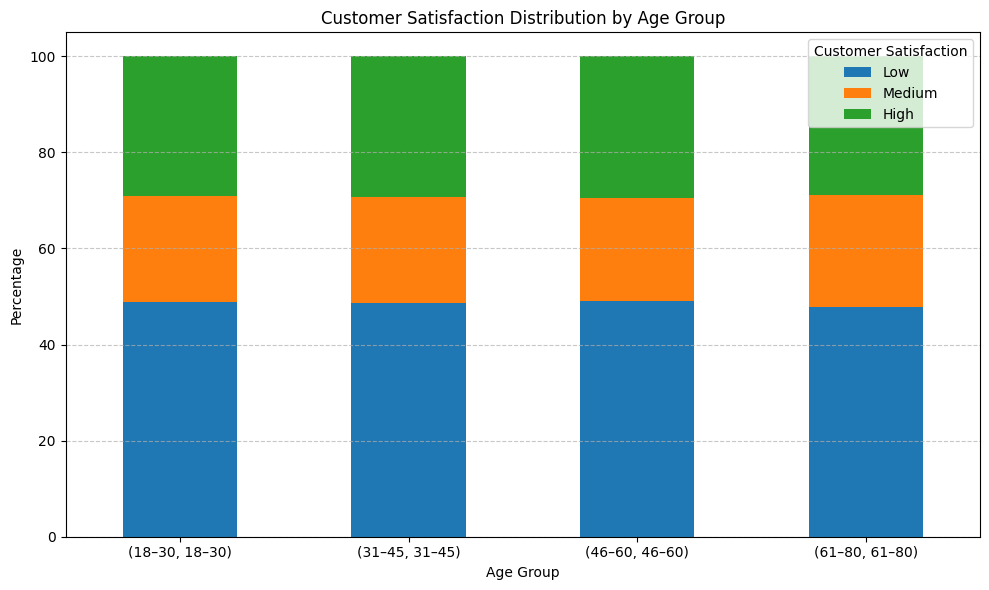

In [ ]:
# Group and calculate percentage
age_satisfaction_percent = (
    df.groupby(['Age_Group', 'Customer_Satisfaction'])
    .size()
    .groupby(level=0)
    .apply(lambda x: 100 * x / x.sum())
    .unstack(fill_value=0)
)

# Plot
age_satisfaction_percent.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Customer Satisfaction Distribution by Age Group')
plt.ylabel('Percentage')
plt.xlabel('Age Group')
plt.xticks(rotation=0)
plt.legend(title='Customer Satisfaction')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
age_satisfaction_percent

,Customer_Satisfaction,Low,Medium,High
Age_Group,Age_Group,,,
18–30,18–30,48.917967,21.942627,29.139406
31–45,31–45,48.565574,22.213115,29.221311
46–60,46–60,48.981361,21.543130,29.475509
61–80,61–80,47.887324,23.270055,28.842621


#Total Claim Count per Policy Type

In [ ]:
# Calculate total claim count per policy type
total_claim_count_per_policy = df.groupby('Policy_Type')['Claim_Count'].sum().reset_index(name='Total_Claim_Count')

# Sort the DataFrame by Total_Claim_Count in descending order
total_claim_count_per_policy = total_claim_count_per_policy.sort_values(by='Total_Claim_Count', ascending=False)

# Display the sorted DataFrame
total_claim_count_per_policy

,Policy_Type,Total_Claim_Count
3,Life,3451.0
0,Auto,3440.0
1,Health,3382.0
2,Home,3314.0
4,Travel,2182.0


#Average Claim Count per Policy Type

In [ ]:
avg_claim_count_per_policy = df.groupby('Policy_Type')['Claim_Count'].mean().reset_index(name='Average_Claim_Count')
avg_claim_count_per_policy

,Policy_Type,Average_Claim_Count
0,Auto,1.555154
1,Health,1.602844
2,Home,1.548598
3,Life,1.617909
4,Travel,1.553025


# High Claim Flag

In [ ]:
# Step 1: Define tenure cutoff for <= 5 years (5 * 365 days)
tenure_cutoff_days = 5 * 365

# Step 2: Calculate mean Claim_Count for these customers
mean_claim_less_medium_tenure = df[df['Tenure_Days'] <= tenure_cutoff_days]['Claim_Count'].mean()

# Step 3: Assign High_Claim_Flag only for customers with ≤ 5 years tenure
df['High_Claim_Flag'] = False  # Default
df.loc[df['Tenure_Days'] <= tenure_cutoff_days, 'High_Claim_Flag'] = (
    df.loc[df['Tenure_Days'] <= tenure_cutoff_days, 'Claim_Count'] > mean_claim_less_medium_tenure
)

In [ ]:
# high-claim customers per policy type
df[df['High_Claim_Flag']].groupby('Policy_Type').size()

,0
Policy_Type,
Auto,310
Health,298
Home,298
Life,317
Travel,191


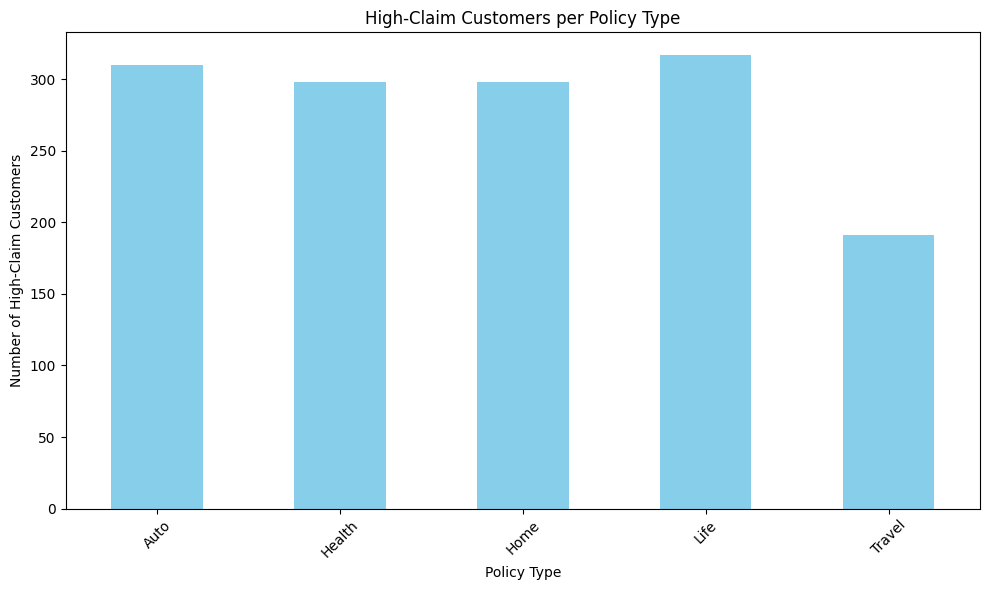

In [ ]:
high_claim_by_policy = df[df['High_Claim_Flag']].groupby('Policy_Type').size()

plt.figure(figsize=(10, 6))
high_claim_by_policy.plot(kind='bar', color='skyblue')
plt.title('High-Claim Customers per Policy Type')
plt.xlabel('Policy Type')
plt.ylabel('Number of High-Claim Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
#High Claim Flag per Region
df['High_Claim_Flag'] = df['Claim_Count'].apply(lambda x: 1 if x > 5 else 0)

# Calculate the count of high claim customers per region
high_claim_per_region = df.groupby('Region')['High_Claim_Flag'].sum().reset_index(name='High_Claim_Count')
high_claim_per_region

,Region,High_Claim_Count
0,East,14
1,North,21
2,South,13
3,West,13


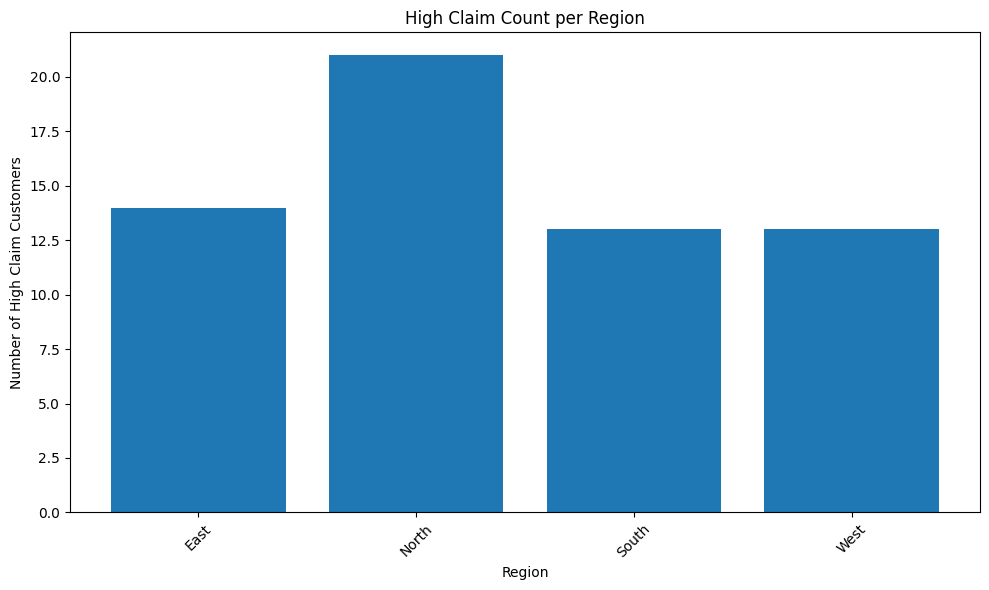

In [ ]:
high_claim_per_region = df.groupby('Region')['High_Claim_Flag'].sum().reset_index(name='High_Claim_Count')

# Plotting the chart
plt.figure(figsize=(10, 6))
plt.bar(high_claim_per_region['Region'], high_claim_per_region['High_Claim_Count'])
plt.title('High Claim Count per Region')
plt.xlabel('Region')
plt.ylabel('Number of High Claim Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#Premium Range

In [ ]:
# Define bins and labels
bins = [0, 300, 600, 1000, np.inf]
labels = ['Low', 'Medium', 'High', 'Very High']

# Create the premium category
df['Premium_Range'] = pd.cut(df['Premium'], bins=bins, labels=labels)

In [ ]:
df['Premium_Range'].value_counts(normalize=True) * 100

,proportion
Premium_Range,
Medium,52.35
High,31.43
Low,15.72
Very High,0.50


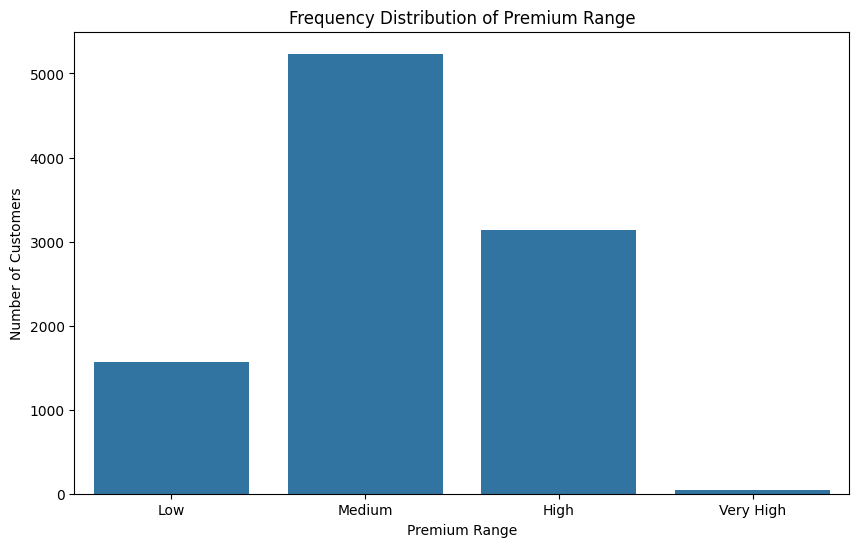

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Premium_Range', data=df)
plt.title('Frequency Distribution of Premium Range')
plt.xlabel('Premium Range')
plt.ylabel('Number of Customers')
plt.show()


In [ ]:
# average satisfaction for each premium group
satisfaction_by_premium = pd.crosstab(df['Premium_Range'], df['Customer_Satisfaction'], normalize='index') * 100
print(satisfaction_by_premium.round(2))

Customer_Satisfaction    Low  Medium   High
Premium_Range                              
Low                    50.32   22.46  27.23
Medium                 48.10   22.25  29.65
High                   48.43   22.43  29.14
Very High              40.00   24.00  36.00


Age_Group      18–30  31–45  46–60  61–80
Premium_Range                            
Low              321    367    345    539
Medium          1047   1311   1208   1669
High             614    747    742   1040
Very High          5     15     12     18


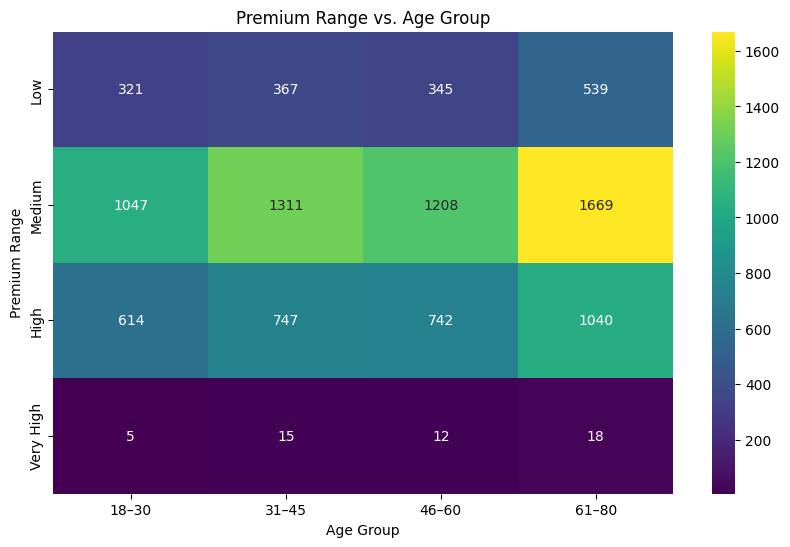

In [ ]:
premium_age_cross = pd.crosstab(df['Premium_Range'], df['Age_Group'])
print(premium_age_cross)

plt.figure(figsize=(10, 6))
sns.heatmap(premium_age_cross, annot=True, fmt='d', cmap='viridis')
plt.title('Premium Range vs. Age Group')
plt.xlabel('Age Group')
plt.ylabel('Premium Range')
plt.show()

<Figure size 1000x600 with 0 Axes>

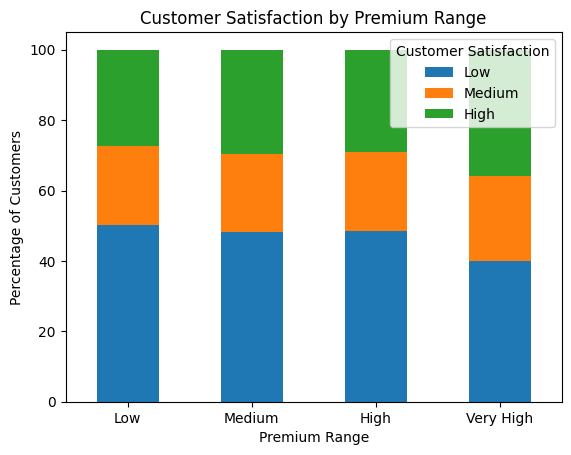

In [ ]:
plt.figure(figsize=(10, 6))
satisfaction_by_premium.plot(kind='bar', stacked=True)
plt.title('Customer Satisfaction by Premium Range')
plt.xlabel('Premium Range')
plt.ylabel('Percentage of Customers')
plt.xticks(rotation=0)
plt.legend(title='Customer Satisfaction')
plt.show()


In [ ]:
# Average Claim Count for premium range
avg_claim_by_premium = df.groupby('Premium_Range')['Claim_Count'].mean()
avg_claim_by_premium

<ipython-input-77-35e3d325e418>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_claim_by_premium = df.groupby('Premium_Range')['Claim_Count'].mean()


,Claim_Count
Premium_Range,
Low,1.599237
Medium,1.570201
High,1.582883
Very High,1.200000


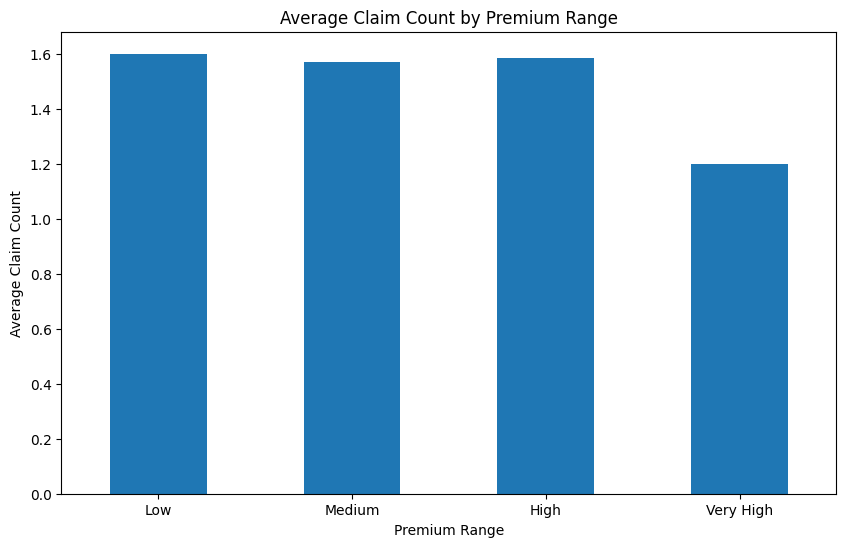

In [ ]:
plt.figure(figsize=(10, 6))
avg_claim_by_premium.plot(kind='bar')
plt.title('Average Claim Count by Premium Range')
plt.xlabel('Premium Range')
plt.ylabel('Average Claim Count')
plt.xticks(rotation=0)
plt.show()


In [ ]:
# Top Policy Types per Range
top_policy_by_premium = df.groupby(['Premium_Range', 'Policy_Type']).size().reset_index(name='count')
top_policy_by_premium = top_policy_by_premium.loc[top_policy_by_premium.groupby('Premium_Range')['count'].idxmax()]
top_policy_by_premium

<ipython-input-79-67b046619276>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_policy_by_premium = df.groupby(['Premium_Range', 'Policy_Type']).size().reset_index(name='count')
<ipython-input-79-67b046619276>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_policy_by_premium = top_policy_by_premium.loc[top_policy_by_premium.groupby('Premium_Range')['count'].idxmax()]


,Premium_Range,Policy_Type,count
0,Low,Auto,369
5,Medium,Auto,1169
11,High,Health,697
17,Very High,Home,17


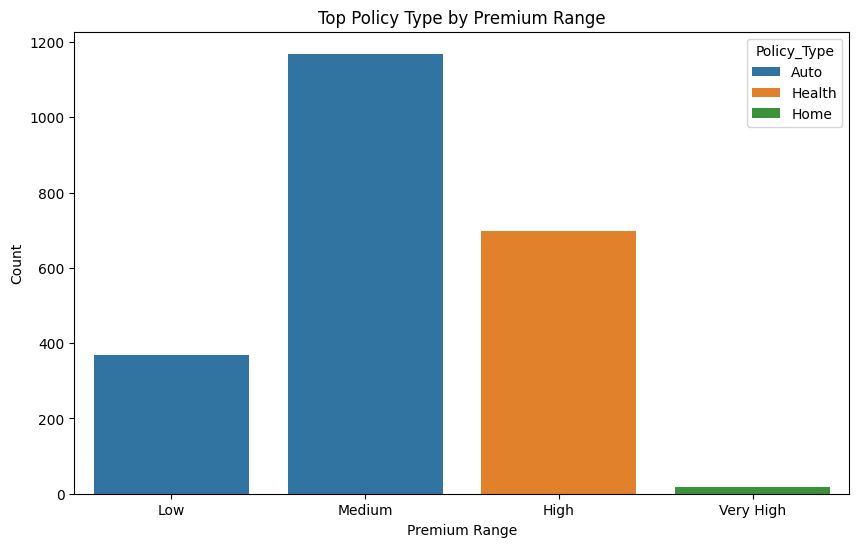

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Premium_Range', y='count', hue='Policy_Type', data=top_policy_by_premium)
plt.title('Top Policy Type by Premium Range')
plt.xlabel('Premium Range')
plt.ylabel('Count')
plt.show()


#Average Premium per Region

In [ ]:
avg_premium_per_region = df.groupby('Region')['Premium'].mean().reset_index(name='Average_Premium')
avg_premium_per_region

,Region,Average_Premium
0,East,519.118957
1,North,516.605222
2,South,510.901304
3,West,519.030754


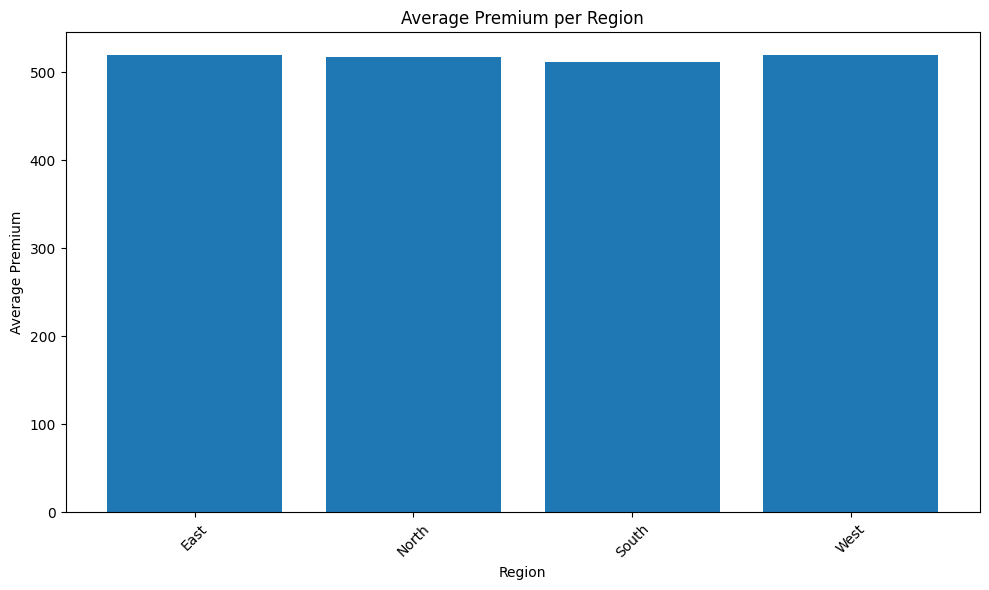

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(avg_premium_per_region['Region'], avg_premium_per_region['Average_Premium'])
plt.title('Average Premium per Region')
plt.xlabel('Region')
plt.ylabel('Average Premium')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#Total Premium per Region

In [ ]:
total_premium_per_region = df.groupby('Region')['Premium'].sum().reset_index(name='Total_Premium')
total_premium_per_region

,Region,Total_Premium
0,East,1319081.27
1,North,1279114.53
2,South,1285427.68
3,West,1280448.87


#Premium Range Breakdown per Region

In [ ]:
premium_range_per_region = df.groupby(['Region', 'Premium_Range']).size().reset_index(name='Count')
premium_range_per_region

<ipython-input-84-5bbe576968ca>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  premium_range_per_region = df.groupby(['Region', 'Premium_Range']).size().reset_index(name='Count')


,Region,Premium_Range,Count
0,East,Low,424
1,East,Medium,1304
2,East,High,797
3,East,Very High,16
4,North,Low,400
5,North,Medium,1290
6,North,High,775
7,North,Very High,11
8,South,Low,390
9,South,Medium,1335


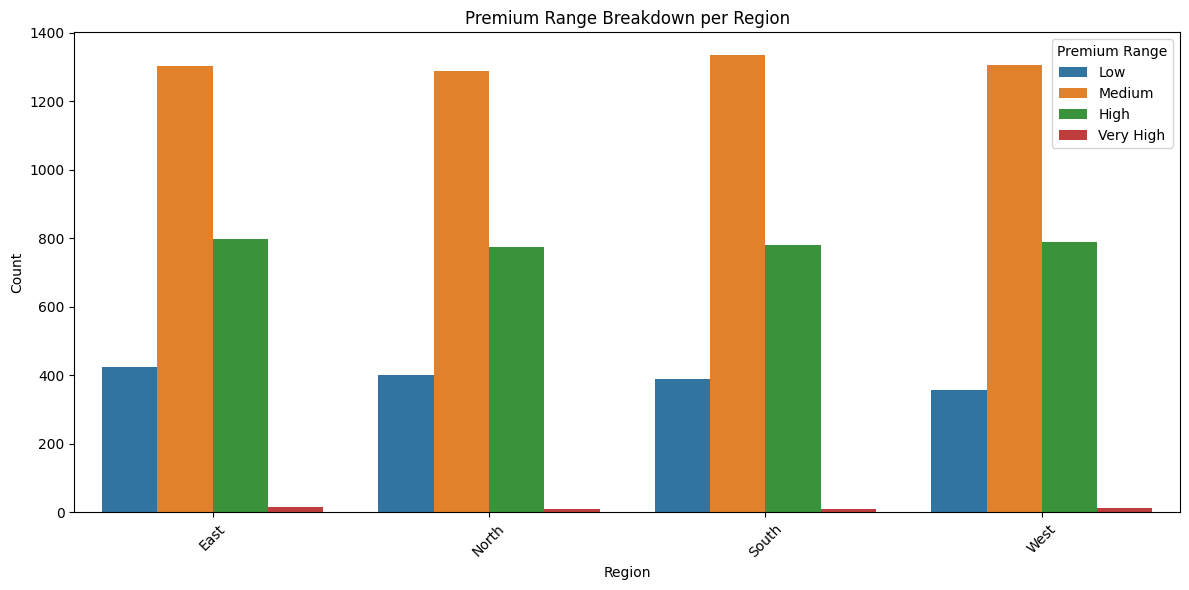

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Count', hue='Premium_Range', data=premium_range_per_region)
plt.title('Premium Range Breakdown per Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Premium Range')
plt.tight_layout()
plt.show()


#KPIs

##Region-wise Performance

In [ ]:
region_summary = df.groupby('Region').agg({
    'Customer_ID': 'count',
    'Premium': 'mean',
    'Claim_Count': 'mean',
    'Tenure_Days': lambda x: (x / 365).mean(),
}).rename(columns={
    'Customer_ID': 'Customer_Count',
    'Premium': 'Avg_Premium',
    'Claim_Count': 'Avg_Claims',
    'Tenure_Days': 'Avg_Tenure_Years'
}).reset_index()
region_summary

,Region,Customer_Count,Avg_Premium,Avg_Claims,Avg_Tenure_Years
0,East,2541,519.118957,1.571429,8.105820
1,North,2476,516.605222,1.590468,7.938607
2,South,2516,510.901304,1.564388,8.134325
3,West,2467,519.030754,1.581678,8.015999


##Policy Type Overview

In [ ]:
policy_summary = df.groupby('Policy_Type').agg({
    'Customer_ID': 'count',
    'Premium': ['mean', 'sum'],
    'Claim_Count': 'mean',
}).reset_index()
policy_summary.columns = ['Policy_Type', 'Customer_Count', 'Avg_Premium', 'Total_Premium', 'Avg_Claims']
policy_summary

,Policy_Type,Customer_Count,Avg_Premium,Total_Premium,Avg_Claims
0,Auto,2212,507.130511,1121772.69,1.555154
1,Health,2110,520.210265,1097643.66,1.602844
2,Home,2140,525.545112,1124666.54,1.548598
3,Life,2133,516.263947,1101191.00,1.617909
4,Travel,1405,511.600327,718798.46,1.553025


##Satisfaction Level Breakdown

In [ ]:
satisfaction_summary = df['Customer_Satisfaction'].value_counts(normalize=True) * 100
satisfaction_summary

,proportion
Customer_Satisfaction,
Low,48.51
High,29.14
Medium,22.35


In [ ]:
pivot_region_policy = pd.pivot_table(
    df,
    values='Premium',
    index='Region',
    columns='Policy_Type',
    aggfunc='mean'
)
pivot_region_policy

Policy_Type,Auto,Health,Home,Life,Travel
Region,,,,,
East,503.305274,521.540748,528.971222,530.165000,509.037135
North,516.473015,509.024864,512.625266,516.403919,534.078192
South,494.328956,518.457486,530.275160,504.586402,505.979135
West,515.169270,532.181976,530.027772,513.785693,496.962069


#Descriptive Statistics

##Customer ID

In [ ]:
unique_customer_count = df['Customer_ID'].nunique()
total_customer_count = len(df)
missing_values_count = df.isnull().sum().sum()

print(f"Count of unique customer IDs: {unique_customer_count}")
print(f"Total number of customers: {total_customer_count}")
print(f"Total number of missing values: {missing_values_count}")

# Check for duplicate Customer_IDs
duplicate_customer_ids = df[df.duplicated(subset=['Customer_ID'], keep=False)]
if not duplicate_customer_ids.empty:
    print("Duplicate Customer IDs found:")
    print(duplicate_customer_ids['Customer_ID'].unique())
else:
    print("No duplicate Customer IDs found.")

Count of unique customer IDs: 10000
Total number of customers: 10000
Total number of missing values: 0
No duplicate Customer IDs found.


##Age

Minimum Age: 18
Maximum Age: 80
Mean Age: 49.3044
Median Age: 49.0
Mode Age: 64
Standard Deviation of Age: 18.189349242966045
Range of Age: 62

Distribution across Age Groups:
Age_Group
18–30    1987
31–45    2440
46–60    2307
61–80    3266
Name: Customer_ID, dtype: int64


<ipython-input-91-eb01a8c72201>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_counts = df.groupby('Age_Group')['Customer_ID'].count()


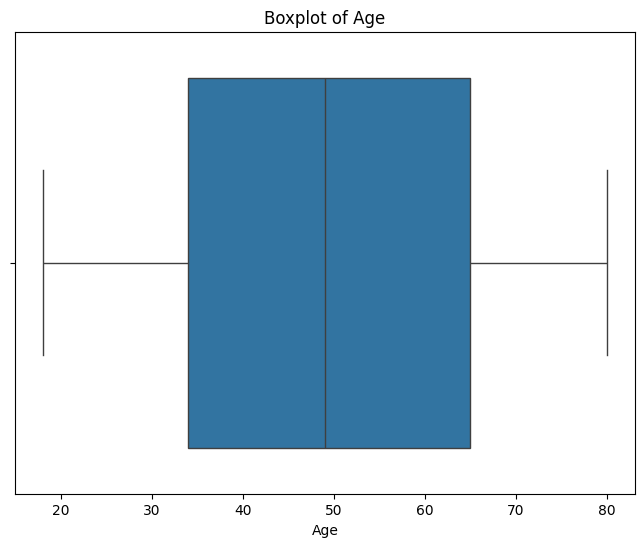

In [ ]:
print(f"Minimum Age: {df['Age'].min()}")
print(f"Maximum Age: {df['Age'].max()}")
print(f"Mean Age: {df['Age'].mean()}")
print(f"Median Age: {df['Age'].median()}")
print(f"Mode Age: {df['Age'].mode()[0]}")
print(f"Standard Deviation of Age: {df['Age'].std()}")
print(f"Range of Age: {df['Age'].max() - df['Age'].min()}")


# Distribution across age groups
age_group_counts = df.groupby('Age_Group')['Customer_ID'].count()
print("\nDistribution across Age Groups:")
print(age_group_counts)

# Outlier detection using boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Age')
plt.show()


##Premium


Premium Statistics:
Minimum Premium: 50.0
Maximum Premium: 4975.0
Mean Premium: 516.407235
Median Premium: 503.12
Mode Premium: 50.0
Standard Deviation of Premium: 291.0972704396767
Range of Premium: 4925.0


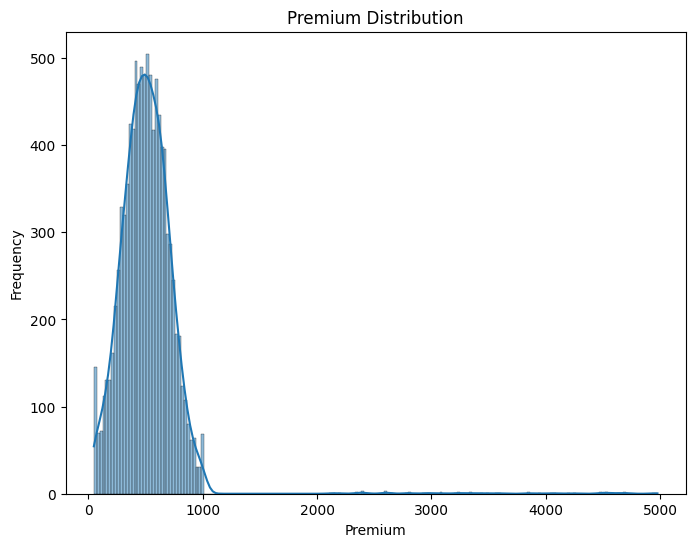


Premium Range Categorization:
Premium_Range
Medium       5235
High         3143
Low          1572
Very High      50
Name: count, dtype: int64


In [ ]:
def calculate_premium_stats(df):
  """Calculates and prints various statistics for the Premium column."""
  print("\nPremium Statistics:")
  print(f"Minimum Premium: {df['Premium'].min()}")
  print(f"Maximum Premium: {df['Premium'].max()}")
  print(f"Mean Premium: {df['Premium'].mean()}")
  print(f"Median Premium: {df['Premium'].median()}")
  print(f"Mode Premium: {df['Premium'].mode()[0]}")
  print(f"Standard Deviation of Premium: {df['Premium'].std()}")
  print(f"Range of Premium: {df['Premium'].max() - df['Premium'].min()}")

  # Distribution (histogram)
  plt.figure(figsize=(8, 6))
  sns.histplot(df['Premium'], kde=True)
  plt.title('Premium Distribution')
  plt.xlabel('Premium')
  plt.ylabel('Frequency')
  plt.show()

  # Range Categorization
  bins = [0, 300, 600, 1000, float('inf')]
  labels = ['Low', 'Medium', 'High', 'Very High']
  df['Premium_Range'] = pd.cut(df['Premium'], bins=bins, labels=labels)
  print("\nPremium Range Categorization:")
  print(df['Premium_Range'].value_counts())

# Call the function with your DataFrame
calculate_premium_stats(df)

##Claim Count


Claim Count Statistics:
Minimum Claim Count: 0.0
Maximum Claim Count: 29.0
Mean Claim Count: 1.5769
Median Claim Count: 1.0
Mode Claim Count: 1.0
Standard Deviation of Claim Count: 1.5340540154023863
Range of Claim Count: 29.0


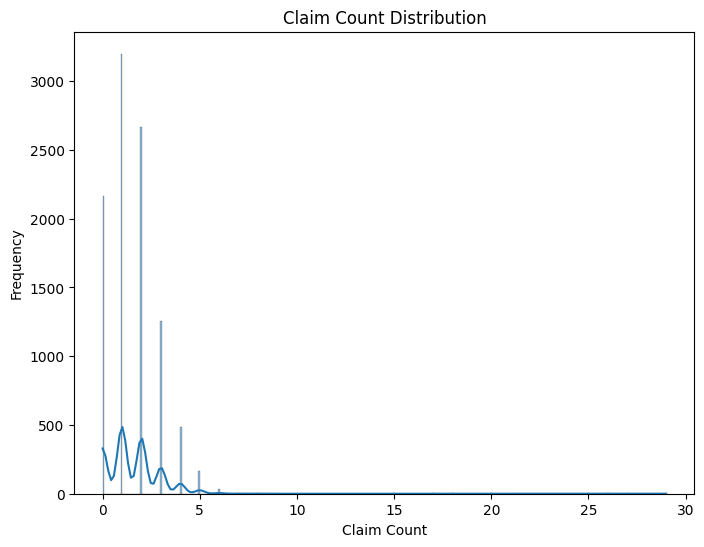

In [ ]:
def calculate_claim_count_stats(df):
  """Calculates and prints various statistics for the Claim_Count column."""
  print("\nClaim Count Statistics:")
  print(f"Minimum Claim Count: {df['Claim_Count'].min()}")
  print(f"Maximum Claim Count: {df['Claim_Count'].max()}")
  print(f"Mean Claim Count: {df['Claim_Count'].mean()}")
  print(f"Median Claim Count: {df['Claim_Count'].median()}")
  print(f"Mode Claim Count: {df['Claim_Count'].mode()[0]}")
  print(f"Standard Deviation of Claim Count: {df['Claim_Count'].std()}")
  print(f"Range of Claim Count: {df['Claim_Count'].max() - df['Claim_Count'].min()}")

  # Distribution (histogram)
  plt.figure(figsize=(8, 6))
  sns.histplot(df['Claim_Count'], kde=True)
  plt.title('Claim Count Distribution')
  plt.xlabel('Claim Count')
  plt.ylabel('Frequency')
  plt.show()

# Call the function with your DataFrame
calculate_claim_count_stats(df)